In [2]:
import os
import requests
import base64
import json
from cached_property import cached_property

In [29]:
class Meijer(object):
    # From Meijer_v5.20.1_apkpure.com/res/values/strings.xml
    account_services_client_id = "mma"
    account_services_secret = "drAqas76Re7RekeBanaMaNEMah7paDE5"
    # Token string, decoded
    token_decoded = f"{account_services_client_id}:{account_services_secret}".encode("UTF-8")
    # Token string, encoded
    basic_token = base64.encodebytes(token_decoded).decode("UTF-8").strip()
    
    def __init__(self, user: str=None, password: str=None):
        """Meijer: Use the Meijer App, programatically, in Python.
        
        user: username/e-mail address for mperks
        pass: password.
        """
        self.user = user
        self.password = password
        # This is set on login.
        self.bearer_token = None
        
    @cached_property
    def session(self):
        # Create a requests session.
        s=requests.Session()
        s.headers.update(
            {
            'Platform': 'Android',
            'Version': '5.20.1',
            'Build': '52001000',
            'Content-Type': 'application/x-www-form-urlencoded',
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0',
            }
        )
        return s

    def post(self, **request):
        r = self.session.post(**request)
        self.r_ = r # debugs
        assert r.status_code==200
        return r
        
        
    def get(self, **request):
        r = self.session.get(**request)
        self.r_ = r # debugs
        assert r.status_code==200
        return r
        
    def login(self):
        request=dict()
        request["url"] = "https://login.meijer.com/as/token.oauth2"
        request["headers"] = {
            'Authorization': f"Basic {self.basic_token}",
        }
        request["params"] =  {
            'grant_type': 'password',
            'scope': 'openid',
            "username": self.user,
            "password": self.password
        }
        r = self.post(**session)
        for key, value in r.json().items():
            setattr(self, key, value)
            
        _, meijer_id64, _ = self.access_token.split(".")
        ids = json.loads(base64.decodebytes(f"{meijer_id64}=".encode()))
        for key, value in ids.items():
            setattr(self, key, value)
            
        self.bearer_token = f'{self.token_type} {self.access_token}'

    @cached_property
    def coupons(self):
        # Coupons
        request=dict()
        request["url"] = "https://mperksservices.meijer.com/dgtlmPerksMMA/api/offers"
        request["headers"] = {
            'Accept': "application/vnd.meijer.digitalmperks.offers-v1.0+json",
            'Authorization': self.bearer_token,
            'Platform': 'Android',
            'Version': '5.20.1',
            'Build': '52001000',
            'Content-Type': 'application/vnd.meijer.digitalmperks.offers-v1.0+json',
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        request["json"] = json.loads('{"categoryId":"","ceilingCount":0,"ceilingDuration":0,"currentPage":1,"displayReasonFilters":[],"getOfferCountPerDepartment":true,"offerClass":1,"offerIds":[],"pageSize":9999,"rewardCouponId":0,"searchCriteria":"","showClippedCoupons":false,"showOnlySpecialOffers":false,"showRedeemedOffers":false,"sortType":"BySuggested","storeId":52,"tagId":"","upcList":[],"zip":""}')
        r = self.session.post(**request)
        self.r_ = r
        assert r.status_code == 200
        return r.json()['listOfCoupons']
    
    def clip(self, coupon):
        if isinstance(coupon, dict):
            meijerOfferId = coupon["meijerOfferId"]
        elif isinstance(coupon, [str, int]):
            meijerOfferId = coupon
        
        request["url"] = "https://mperksservices.meijer.com/dgtlmPerksMMA/api/offers/Clip"
        request["headers"] = {
            'Accept': "application/vnd.meijer.digitalmperks.clip-v1.0+json",
            'Authorization': self.bearer_token,
            'Platform': 'Android',
            'Version': '5.20.1',
            'Build': '52001000',
            'Content-Type': 'application/vnd.meijer.digitalmperks.clip-v1.0+json',
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        request["json"] = {
            "meijerOfferId": meijerOfferId
        }
        r = self.session.post(**request)
        self.r_ = r
        assert r.status_code == 200
        
    @cached_property
    def stores(self):
        request=dict()
        request["url"] = "https://mservices.meijer.com/storeinfo/api/mobile/near"
        request["headers"] = {
            'Version': "7",
            'Authorization': self.bearer_token,
        }
        latitude, longitude=43.016570, -85.726290
        request["params"] =  {
            'latitude': latitude,
            'longitude': longitude,
            'miles': '10000',
            'numToReturn': '10000',
        }
        r = self.session.get(**request)
        self.r_ = r
        assert r.status_code == 200
        return r.json()["store"]

    def get_store(self, store_id):
        request=dict()
        request["url"] = "https://mservices.meijer.com/storeinfo/api/mobile/stores/{}?dataVariant=2".format(store_id)
        request["headers"] = {
            'Version': '7',
            'Authorization': self.bearer_token,
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        r = self.session.get(**request)
        self.r_ = r
        assert r.status_code==200
        return r.json()["store"][0]

    def __repr__(self):
        return "Meijer<>"
    
    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        pass

In [30]:
meijer_email, meijer_pass,  = os.environ["MEIJER_API_KEY"].strip().split("|")
m = Meijer(meijer_email, meijer_pass)
self = m

In [31]:
m.login()

NameError: name 'session' is not defined

In [32]:
len(m.stores)

AssertionError: 

In [ ]:
m.login

In [4]:
with Meijer(meijer_email, meijer_pass) as meijer:
    stores = meijer.stores

In [5]:
for store in stores:
    for pop in ["AuxUnitInfo", "GasStationAmenities", "GasStationHours"]:
        try:
            store.pop(pop)
        except:
            pass

In [6]:
def MeijerStore(self):
    def __init__(self, cfg):
        self.cfg=cfg
        
    @property
    def latitude(self):
        return self.cfg["latitude"]
    
    @property
    def longitude(self):
        return self.cfg["longitude"]
        
    def __repr__(self):
        return f"<MeijerStore({self.latitude}, {self.longitude})>"

In [7]:
from dotty_dict import dotty

In [8]:
for store_id in range(100):
    try:
        store = m.get_store(store_id)
        break
    except:
        pass

In [9]:
for key, value in store.items():
    print(type(value))

<class 'dict'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'bool'>
<class 'list'>


In [10]:
def f7(seq):
    # Not order preserving
    unique = (list(set(seq)))
    return unique

In [11]:
f7([type(value) for key, value in store.items()])

[bool, NoneType, list, float, int, str, dict]

In [12]:
type(value)

list

In [13]:
parameters_by_class=dict()
for key, value in store.items():
    t = (type(value).__name__)
    if t not in parameters_by_class:
        parameters_by_class[t]=dict()
    parameters_by_class[t][key]=value
parameters_by_class

{'dict': {'AuxUnitInfo': {'AuxUnitId': 3019,
   'UnitId': 19,
   'Address': '650 W Norton Ave',
   'AddressLine2': '',
   'LongName': 'Norton Shores',
   'ShortName': 'GS-3019',
   'PhoneNumber': '',
   'City': 'Muskegon',
   'State': 'MI',
   'ZipCode': '494410000',
   'OpenDate': '2009-06-30T00:00:00',
   'CloseDate': '1901-01-01T00:00:00',
   'UpdatedTimestamp': '0001-01-01T00:00:00',
   'Latitude': 43.19129,
   'Longitude': -86.26104,
   'ImageURL': 'http://us411.co/liberty_tax/images/Meijer_Logo2.jpg',
   'ImageSize': 720,
   'ImageFormat': 'jpg',
   'TimeZone': 'E',
   'DaylightSavings': '1',
   'AuxUnitTypeId': 0,
   'AuxUnitType': None}},
 'list': {'GasStationAmenities': [{'UnitId': 19,
    'AuxiliaryUnitId': 3019,
    'AmentityType': 'Beer',
    'AmentityGroupType': 'Station'},
   {'UnitId': 19,
    'AuxiliaryUnitId': 3019,
    'AmentityType': 'Open 24 Hrs',
    'AmentityGroupType': 'Station'},
   {'UnitId': 19,
    'AuxiliaryUnitId': 3019,
    'AmentityType': 'Atm',
    'Amen

In [14]:
parameters_by_class['float']

{'latitude': 43.19307, 'longitude': -86.26123, 'milesFrom': 0.0}

In [15]:
parameters_by_class['int']

{'unitid': 19}

In [16]:
parameters_by_class['bool']

{'isPharmacy': False}

In [17]:
parameters_by_class['str']

{'UnitType': 'MS',
 'IsMobileShoppingEnabled': 'Y',
 'IsMobilePaymentEnabled': 'N',
 'streetAddress': '700 W Norton Ave',
 'city': 'Muskegon',
 'state': 'MI',
 'zip': '49441',
 'storeHours': 'Open 24 hrs a day, 364 days a year.',
 'storeName': '700 W Norton Ave, Muskegon, MI 49441',
 'storeShortName': 'Norton Shores',
 'storePhoneNumber': '2317399381',
 'pharmacyPhone': '2317335710'}

In [18]:
parameters_by_class['list']

{'GasStationAmenities': [{'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Beer',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Open 24 Hrs',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Atm',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Lotto',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'RestRoom',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Gift Cards',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Tobacco',
   'AmentityGroupType': 'Station'},
  {'UnitId': 19,
   'AuxiliaryUnitId': 3019,
   'AmentityType': 'Propane',
   'AmentityGroupType': 'Station'}],
 'GasStationHours': [{'DayOfTheWeek': 'Sunday',
   'OpenTime': '00:00:00',
   'CloseTime'

In [19]:
fuel_stores = list()
for store in m.stores:
    if store["FuelPrices"] is None:
        continue
    for fuel in store["FuelPrices"]:
        store[fuel["FuelType"].split("-")[1]]=fuel["FuelPrice"]
        store[fuel["FuelType"]+"_time"]=fuel["PriceEffectiveDate"]
    for f in ["AuxUnitInfo", "GasStationAmenities", "GasStationHours"]:
        try:
            store.pop(f)
        except:
            pass
    fuel_stores.append(store)
    len(store["FuelPrices"])

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(fuel_stores)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

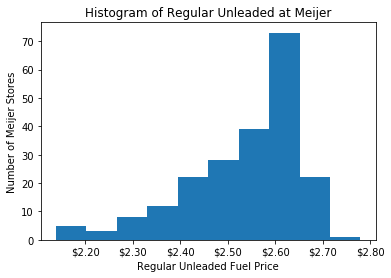

In [25]:
ax = df["Regular Unleaded"].plot(kind='hist', bins=10)
plt.title("Histogram of Regular Unleaded at Meijer")
plt.xlabel("Regular Unleaded Fuel Price")
plt.ylabel("Number of Meijer Stores")
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

In [27]:
m.get_store(71)

{'AuxUnitInfo': {'AuxUnitId': 3071,
  'UnitId': 71,
  'Address': '1800 Holton Rd',
  'AddressLine2': '',
  'LongName': 'Holton Road - North Muskegon',
  'ShortName': 'GS-3071',
  'PhoneNumber': '231744-7629',
  'City': 'North Muskegon',
  'State': 'MI',
  'ZipCode': '494451532',
  'OpenDate': '1990-11-13T00:00:00',
  'CloseDate': '1901-01-01T00:00:00',
  'UpdatedTimestamp': '0001-01-01T00:00:00',
  'Latitude': 43.28586,
  'Longitude': -86.22109,
  'ImageURL': 'http://us411.co/liberty_tax/images/Meijer_Logo2.jpg',
  'ImageSize': 720,
  'ImageFormat': 'jpg',
  'TimeZone': 'E',
  'DaylightSavings': '1',
  'AuxUnitTypeId': 0,
  'AuxUnitType': None},
 'GasStationAmenities': [{'UnitId': 71,
   'AuxiliaryUnitId': 3071,
   'AmentityType': 'Beer',
   'AmentityGroupType': 'Station'},
  {'UnitId': 71,
   'AuxiliaryUnitId': 3071,
   'AmentityType': 'Kerosene',
   'AmentityGroupType': 'Station'},
  {'UnitId': 71,
   'AuxiliaryUnitId': 3071,
   'AmentityType': 'Open 24 Hrs',
   'AmentityGroupType': 